In [ ]:
!git clone https://github.com/DiploDatos/IntroduccionAprendizajeAutomatico.git

Cloning into 'IntroduccionAprendizajeAutomatico'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 145 (delta 28), reused 40 (delta 12), pack-reused 87
Receiving objects: 100% (145/145), 611.70 KiB | 1.77 MiB/s, done.
Resolving deltas: 100% (54/54), done.


# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET # aca define a X como una matriz que incluye unicamente las variables explicativas
                                           # y a y como una lista formada por las realizaciones de la variable dependiente 
                                           # (TARGET) para cada indice, osea para cada ejemplo
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X # para ver cómo queda X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...
1849,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

  El conjunto de datos en cuestión contiene información sobre personas que recientemente  aplicaron y recibieron una línea de crédito a través del modelo actual de otorgamiento de préstamos del banco. El objetivo del banco es utilizar esta información para automatizar la decisión de conceder o denegar una solicitud de préstamo, para lo cual quieren desarrollar un sistema que tome dicha decision basándose en un modelo de scoring.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

  La variable objetivo que hay que predecir se llama "TARGET" y es una variable categórica binaria que adquiere el valor 1 si el cliente en cuestión defaulteó su deuda, y el valor 0 si el cliente devolvió el préstamo. 

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

  Se dispone de 10 variables independientes o explicativas para cada cliente, teniendo cada una de ellas el siguiente significado:

  LOAN: Monto del préstamos.

  MORTDUE: Monto adeudado por la hipoteca actual.
  
  VALUE: Valor de la casa.
  
  YOJ: Años que lleva en el trabajo actual.
  
  DEROG: Número de informes negativos.
 
  DELING: Número de líneas de crédito en mora.
  
  NINQ: Número de líneas de crédito recientes.
  
  CLNO: Número de líneas de crédito.
  
  DEBTINC: Ratio Deuda/Ingreso.

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

  A simple vista imaginamos que los atributos más importantes para predecir la devolución o no del préstamo serán la magnitud del mismo (LOAN), el historial crediticio de la persona (DEROG Y DELINQ) y qué tan pesada es la deuda que tiene que devolver en relación a sus ingresos (DEBTINC).

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
# ENTRENAMIENTO:

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

clf = SGDClassifier(random_state=0)
scaler = StandardScaler()

 # Normalizamos (sólo los imputs) para tener mejor resultados del Algoritmo Descenso Gradiente
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test) 

 # Entrenamos los datos normalizados con el Algoritmo Descenso Gradiente

clf.fit(X_train_s, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# PREDICCIÓN:

y_train_predict = clf.predict(X_train_s)

y_test_predict = clf.predict(X_test_s)

##### Accuracy:
  
  La accuracy es una medida que simplemente indica la proporcion de nuestras predicciones que fueron correctas, independientemente de si corresponden a la categoría positiva o negativa. 
  El problema con la accuracy es que puede suceder que se vuelva una métrica inútil por sí sola, especialmente cuando el conjunto de test está muy desbalanceado: un modelo que sólo prediga negativos puede tener una accuracy del 98% en un data set en el que sólo el 2% de las observaciones son positivas. Es por eso que se torna necesario usar otras métricas de evaluación de la performance del modelo que tengan en cuenta el hecho de algunas veces es mucho más costoso, en el contexto en el que se esté trabajando, tener falsos negativos que falsos positivos y viceversa. 

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_predict)
test_acc = accuracy_score(y_test, y_test_predict)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.87
Test accuracy: 0.87


##### Precision:

  La precision del modelo indica la proporción de predicciones positivas correctas (True Positives) respecto al total de predicciones positivas (True Positives + False Positives). Mientras mayor sea la precisión, significa que un mayor porcentaje de mis predicciones positivas fueron correctas y por lo tanto estoy teniendo pocas falsas alarmas (Falsos Positivos). Esto es muy útil de saber porque cuando pase a utilizar el modelo para predecir sobre un nuevo conjunto de datos, saber que la precisión de mi algoritmo es alta me da cierta seguridad para tratar los casos predecidos como positivos sin espacio para dudar de lo que sucedería si me estoy equivocando. 

In [ ]:
from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_predict)
test_precision = precision_score(y_test, y_test_predict)

print(f'Train precision: {train_precision: 0.2}')
print(f'Test precision: {test_precision: 0.2}')

Train precision:  0.71
Test precision:  0.65


In [ ]:
# También podríamos crear nosotros mismos una funcion que calcula la precisión del modelo:

def precision(lista1, lista2):
    numerador = ((lista1 == 1) & (lista1 == lista2)).sum()
    denominador = (lista1 == 1).sum()
    return (numerador/denominador)
                               

precision_entrenamiento = precision(y_train_predict, y_train)
precision_test = precision(y_test_predict, y_test)

print(f'Train precision: {precision_entrenamiento: 0.2}')
print(f'Test precision: {precision_test: 0.2}')


Train precision:  0.71
Test precision:  0.65


##### Recall:

  La Recall es la tasa de verdaderos positivos, mide la proporción de verdaderos positivos (True Positives) respecto al total de casos efectivamente positivos en el conjunto. 

In [ ]:
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_predict)
test_recall = recall_score(y_test, y_test_predict)

print(f'Train recall: {train_recall: 0.2}')
print(f'Test recall: {test_recall: 0.2}')

Train recall:  0.42
Test recall:  0.34


In [ ]:
# También podríamos crear nosotros mismos una funcion que calcule la recall del modelo:

def recall(lista1, lista2):
    numerador = ((lista1 == 1) & (lista1 == lista2)).sum()
    denominador = (lista2 == 1).sum()
    return (numerador/denominador)
                               

recall_entrenamiento = recall(y_train_predict, y_train)
recall_test = recall(y_test_predict, y_test)

print(f'Train recall: {recall_entrenamiento: 0.2}')
print(f'Test recall: {recall_test: 0.2}')

Train recall:  0.42
Test recall:  0.34


##### F1:

  El Score F1 es una medida bastante completa que combina simultaneamente la Precision y la Recall mediante la siguiente fórmula:

        F1 = 2 . (Precision * Recall) / (Precision + Recall)

In [ ]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_predict)
test_f1 = f1_score(y_test, y_test_predict)

print(f'Train F1: {train_f1: 0.2}')
print(f'Test F1: {test_f1: 0.2}')

Train F1:  0.53
Test F1:  0.45


In [ ]:
# También podríamos crear nosotros mismos una funcion que calcule la F1 del modelo:

def f1(lista1, lista2):
    numerador = 2 * (precision(lista1, lista2) * recall(lista1, lista2))
    denominador = (precision(lista1, lista2) + recall(lista1, lista2))
    return (numerador/denominador)
                               

f1_entrenamiento = f1(y_train_predict, y_train)
f1_test = f1(y_test_predict, y_test)

print(f'Train F1: {f1_entrenamiento: 0.2}')
print(f'Test F1: {f1_test: 0.2}')

Train F1:  0.53
Test F1:  0.45


##### Matriz de Confusiones

  La Matriz de Confusiones es muy útil para saber cuáles son las clases o categorías de la variable dependiente en las que se cometen más errores al momento de predecir. 
  Las filas de la Matriz de predicciones se corresponden con las verdaderas clases de la variable categórica (en nuestro ejemplo que nos encontramos frente a una variable binaria, sólo tendremos dos filas), mientras que las columnas se corresponden con las clases predichas (y por ende también tendremos dos columnas). Si sumamos las filas de la matriz, obtendremos la cantidad de ejemplos corresponientes a la clase de esa fila, mientras que si sumamos por columna, obtendremos la cantidad de ejemplos que se predijeron corresponden a esa clase. Por lo tanto, un modelo de prediccion perfecto generaria una Matriz de Confusiones diagonal, es decir, que sólo va a tener elemenos distintos de cero en las posiciones pertenecientes a la diagonal principal.

In [ ]:
from sklearn.metrics import confusion_matrix

print('CONFUSION MATRIX:')
confusion_matrix(y_test, y_test_predict)


CONFUSION MATRIX:


array([[302,  11],
       [ 38,  20]])

La matriz de confusiones se puede interpretar de la siguiente manera: en el conjunto de test había 313 casos de personas que pagaron su deuda, de los cuales nuestros modelos predijo correctamente 302 y se confundio en 11. Es decir, hay 11 personas que nuestro modelo predijo que NO pagaron su deuda cuando en realidad si la pagaron.
Por otra parte, en el conjunto de test hay tambien 58 personas que efectivamente defaultearon su deuda, de los cuales nuestro modelo predijo correctamente 20 y se equivocó en 38. Es decir, hay 38 personas para los cuales nuestro modelo predijo que SI pagaron la deuda cuando en realidad NO la pagaron.
Al interpretar la matriz nos damos cuentas que acualmente el modelo se encuentra sesgado para los casos positivos, es decir presenta una tendencia a decir que las personas si devuelven su deuda. 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

##### Cross-Validation: 

  El método de Cross-Validation consiste en tomar el training set y dividirlo en n (en este caso 5) subgrupos. Luego, se aplica el modelo clasifcador seleccionado 5 veces: en cada una se utiliza un subgrupo distinto como conjunto de validación y los restantes como conjunto de entrenamiento. Esto sirve para tener distintas estimaciones y métricas respecto a qué tan bien funciona el modelo cuando se lo entrena y valida con distintos conjuntos. 

In [ ]:
# Cross-Validaiton:

from sklearn.model_selection import cross_val_score

# La consigna pide que usemos un 5-fold cross validation, por lo que se procede a dividir el conjunto de entrenamiento X en 5 subgrupos:

subgrupos = cross_val_score(clf, X, y, cv=5)

print("Accuracy de cada subgrupo:", subgrupos)
print("Accuracy promedio de todos los modelos:",subgrupos.mean())
print("Desviación Standar de las accuracies:", subgrupos.std())

Accuracy de cada subgrupo: [0.82210243 0.8328841  0.8328841  0.8328841  0.3972973 ]
Accuracy promedio de todos los modelos: 0.7436104028556859
Desviación Standar de las accuracies: 0.17320689488389635


In [ ]:
# A continuacion defino todas las variantes que quiero que se vayan aplicando en los hiperparámetros de mi modelo. Entonces, por ejemplo, el
# argumento loss es una lista que indica las diferentes funciones de costo que que va a minimizar mi clasificador. Lo mismo sucede con el 
# parámetro penalty (que indica los distintos niveles de penalidad que le confiero a la posibilidad de que el modelo caiga en overfitting),
# y con learning rate. 

param_grid = {
    'loss' : ['hinge', 'log', 'perceptron', 'modified_huber', 'squared_hinge'],
    'penalty' : ['l2', 'l1', 'elasticnet'], 
    'learning_rate' : ['constant','optimal','invscaling','adaptive'],
    'eta0' : [0.1,0.2,0.4,1]
}

In [ ]:
# Entreno el modelo probando los distintos hiperparámetros (pero notar que el clasificador utilizado sigue siendo el Algoritmo de Descenso
# Gradiente, lo único que cambia es que ahora se va a ir aplicando dicho algoritmo pero cada vez con hiperparámetros distintos y desdoblando
# el conjunto de entrenamiento en tres subgrupos distintos)

from sklearn.model_selection import GridSearchCV

nuevo_modelo = GridSearchCV(clf, param_grid, scoring='accuracy', cv=3)

nuevo_modelo.fit(X, y);

In [ ]:
resultados = nuevo_modelo.cv_results_
df = pd.DataFrame(resultados)
df[['param_loss', 'param_penalty','param_eta0', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_penalty,param_eta0,mean_test_score,std_test_score,rank_test_score
0,hinge,l2,0.1,0.807443,0.035476,113
1,hinge,l1,0.1,0.809601,0.017594,104
2,hinge,elasticnet,0.1,0.811758,0.015762,96
3,log,l2,0.1,0.820388,0.018307,78
4,log,l1,0.1,0.601942,0.304640,213
...,...,...,...,...,...,...
235,modified_huber,l1,1,0.745955,0.036614,170
236,modified_huber,elasticnet,1,0.748112,0.037048,162
237,squared_hinge,l2,1,0.751888,0.031828,146
238,squared_hinge,l1,1,0.747033,0.036287,168


In [ ]:
# ¿Entonces cuál es el mejor modelo?

df2 = df.loc[df.rank_test_score == 1]
df2[['param_loss', 'param_penalty','param_eta0', 'mean_test_score', 'std_test_score', 'rank_test_score']]



,param_loss,param_penalty,param_eta0,mean_test_score,std_test_score,rank_test_score
19,log,l1,0.1,0.833333,0.0,1
79,log,l1,0.2,0.833333,0.0,1
102,squared_hinge,l2,0.2,0.833333,0.0,1
104,squared_hinge,elasticnet,0.2,0.833333,0.0,1
139,log,l1,0.4,0.833333,0.0,1
180,hinge,l2,1,0.833333,0.0,1
186,perceptron,l2,1,0.833333,0.0,1
199,log,l1,1,0.833333,0.0,1
213,log,l2,1,0.833333,0.0,1
219,modified_huber,l2,1,0.833333,0.0,1


In [ ]:
# ¿De todos los rankeados como 1 cuál es efectivamente el mejor?
# A continuación se imprime los mejores valores posibles de los hiperparámetros del clasificador de Descenso Gradiente.

mejor_estimador = nuevo_modelo.best_estimator_

nuevo_modelo.best_params_ , mejor_estimador 


({'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l1'},
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
               n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
               random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
               verbose=0, warm_start=False))

Ahora que ya conozco el valor de los hiperparámetros que generan, en conjunto, el mejor modelo predictivo posible dados los datos, procedo a entrenar un modelo utilizando esos valores para los hiperparámetros. 
Luego, al obtener las métricas de accuracy, precisión y demás, deberían dar mejor que las obtenidas para el primer modelo en el que simplemente se utilizaron los hiperparámetros que vienen por default con scikit learn.

In [ ]:
# ENTRENAMIENTO CON EL MEJOR MODELO POSIBLE

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

clf = SGDClassifier(loss = 'hinge', learning_rate = 'constant',penalty = 'l1', eta0 = 0.1, random_state=0)
scaler = StandardScaler()

 # Normalizamos (sólo los imputs) para tener mejor resultados del Algoritmo Descenso Gradiente
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test) 

 # Entrenamos los datos normalizados con el Algoritmo Descenso Gradiente

clf.fit(X_train_s, y_train)

# PREDICCIÓN CON EL MEJOR MODELO POSIBLE

y_train_predict = clf.predict(X_train_s)

y_test_predict = clf.predict(X_test_s)

# MÉTRICAS DE PERFOMANCE DEL MEJOR MODELO POSIBLE

print("Best model accuracy:",accuracy_score(y_test, y_test_predict).round(2))
print("Best model precision",precision_score(y_test, y_test_predict).round(2))
print("Best model recall",recall_score(y_test, y_test_predict).round(2))
print("Best model F1",f1_score(y_test, y_test_predict).round(2)) 
print('Best model confusion matrix:')
confusion_matrix(y_test, y_test_predict)

Best model accuracy: 0.88
Best model precision 1.0
Best model recall 0.24
Best model F1 0.39
Best model confusion matrix:


array([[313,   0],
       [ 44,  14]])

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


  El Árbol de decisión es un modelo de clasificación muy simple. Su modo de clasificar consiste en ir haciendo preguntas en cada nodo respecto de los atributos de las variables independientes y dependiendo de los valores que puedan adoptar esos atributos, se abren distintas ramas a partir de esos nodos que llevan a otro subárbol y asi hasta tener una clasificación completa. 
  El algoritmo detrás de la construcción del arbol es un algoritmo "greedy" que tiene como objetivo formar el árbol más simple posible. El algoritmo greedy aprende usando el concepto de recursión y de entropía: empieza con un árbol vacío y luego selecciona el atributo que estará en el nodo raíz. Cada valor posible que tomen los datos en ese atributo definirán las ramas que salen de ese nodo. Finalmente, parado en cada rama repite este procedimiento (recursión) hasta completar el árbol.  
  Como se mencionó, el criterio según el cual el algoritmo selecciona el mejor atributo posible para localizar en cada nodo se basa en el concepto de entropía (aunque con scikit learn podemos pedirle que seleccione utilizando otros criterios). La entropía es una medida de incertidumbre: mientras mayor sea la incertidumbre respecto a los resultados posibles de un evento, mayor será la entropía del mismo. Entonces, lo que hace el algoritmo greedy en cada nodo es elegir el atributo que menor entropía tenga, porque utilizar los atributos que más certeza ofrezcan permitirá llegar lo más rapido posible a predecir la variable, lo cual es equivalente a decir que se está formando el árbol más chico o simple posible, que es el objetivo final del algoritmo.

In [ ]:
# CALCULAR LA ENTROPIA

def probs(y):
    _, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return probs

def entropy(y):
    p = probs(y)
    return - np.sum(p * np.log2(p))

print("Probabilidades a priori de que una persona devuelva y NO devuelva su préstamo, respectivamente:", probs(y_train))
print("Entropía a priorio del data set:", entropy(y_train))

Probabilidades a priori de que una persona devuelva y NO devuelva su préstamo, respectivamente: [0.83074848 0.16925152]
Entropía a priorio del data set: 0.65598969959707


Pero la recien calculada es la entropía a priori del dataset, que no sirve para determinar cuál es el atributo o variable independiente con las que más conviene ir armando los nodos del árbol. Para ello se deben calcular las entropías condicionales a cada uno de los atributos para luego poder calcular cuál de ellos es el que genera una mayor ganancia de información.
Sin embargo, como muchas de las variables independientes del dataset son reales (cuantitativas) para poder calculcar cada una de las entropías condicionales deberíamos primero seleccionar un umbral o threshold donde hacer el "corte" en los valores posibles de esa variable para poder separar las ramas. Este procedimiento se vuelve muy tedioso de hacerlo a mano para tantas variables y para tantos valores, por lo que se procede directamente a confeccionar el árbol con las funciones de scikit learn.


In [ ]:
from sklearn.tree import DecisionTreeClassifier


clft = DecisionTreeClassifier(random_state=0)

# ENTRENAMIENTO

clft.fit(X_train, y_train)

# PREDICCION

y_train_predict = clft.predict(X_train)
y_test_predict = clft.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, y_train_predict)
test_acc = accuracy_score(y_test, y_test_predict)
prec_test = precision_score(y_test, y_test_predict)
recall_test = recall_score(y_test, y_test_predict)
f1_test = f1_score(y_test, y_test_predict)


print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy : {test_acc:0.2}')
print(f'Test precision: {prec_test:0.2}')
print(f'Test recall   : {recall_test:0.2}')
print(f'Test f1 score : {f1_test:0.2}')
print('CONFUSION MATRIX:')
confusion_matrix(y_test, y_test_predict)

Train accuracy: 1.0
Test accuracy : 0.88
Test precision: 0.62
Test recall   : 0.64
Test f1 score : 0.63
CONFUSION MATRIX:


array([[290,  23],
       [ 21,  37]])

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Cross-Validaiton:

from sklearn.model_selection import cross_val_score

# La consigna pide que usemos un 5-fold cross validation, por lo que se procede a dividir el conjunto de entrenamiento X en 5 subgrupos:

subgrupos = cross_val_score(clft, X, y, cv=5)

print("Accuracy de cada subgrupo:", subgrupos)
print("Accuracy promedio de todos los modelos:",subgrupos.mean())
print("Desviación Standar de las accuracies:", subgrupos.std())

Accuracy de cada subgrupo: [0.8328841  0.8328841  0.8490566  0.86522911 0.87297297]
Accuracy promedio de todos los modelos: 0.8506053762657537
Desviación Standar de las accuracies: 0.016399080200692626


In [ ]:
# A continuacion defino todas las variantes que quiero que se vayan aplicando en los hiperparámetros de mi modelo. Entonces, por ejemplo, el
# argumento  criterion indica los diferentes conceptos que el algoritmo debe tener en cuenta al momento de decidir qué atributo poner en cada nodo (el
# concepto de entropía ya fue explicado más arriba). En cuanto al hiperparámetro max_depth, indica la cantidad máxima de niveles que quiero que tenga el
# árbol. A modo de comparación, recien cuando utilizamos el clasificador con todos los hiperparámetros seteados en su valor de default, el árbol quedó tan
# grande o profundo que dibujarlo con dimensiones sensatas resultaba imposible. Finalmente, el hiperparámetro min_samples_leaf indica la cantidad mínima de
# muestras que quiero que tenga en cuenta cada nodo.  

param_grid = {
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'criterion' : ['gini', 'entropy'], 
    'max_depth' : [1,2,3]
}

In [ ]:
# Entreno el modelo probando los distintos hiperparámetros definidos en la celda anterior (pero notar que el clasificador utilizado sigue siendo 
# el Árbol de Decisión, lo único que cambia es que ahora se va a ir aplicando dicho algoritmo pero cada vez con hiperparámetros distintos y desdoblando
# el conjunto de entrenamiento en tres subgrupos distintos)

from sklearn.model_selection import GridSearchCV

nuevo_modelo = GridSearchCV(clft, param_grid, scoring='accuracy', cv=3)

nuevo_modelo.fit(X, y);

In [ ]:
resultados = nuevo_modelo.cv_results_
df = pd.DataFrame(resultados)
df[['param_max_depth', 'param_criterion','param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].head()

,param_max_depth,param_criterion,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,1,gini,1,0.87109,0.013234,7
1,1,gini,2,0.87109,0.013234,7
2,1,gini,3,0.87109,0.013234,7
3,1,gini,4,0.87109,0.013234,7
4,1,gini,5,0.87109,0.013234,7


In [ ]:
# ¿Entonces cuál es el mejor modelo?

df2 = df.loc[df.rank_test_score == 1]
df2[['param_max_depth', 'param_criterion','param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_max_depth,param_criterion,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
18,2,gini,9,0.875944,0.008494,1
19,2,gini,10,0.875944,0.008494,1


In [ ]:
# ¿De los dos modelos rankeados como 1 cuál es efectivamente el mejor, el que tiene min_samples_leaf igual a 9 o a 10?
# A continuación se imprime los mejores valores posibles de los hiperparámetros del clasificador de Descenso Gradiente.

mejor_estimador = nuevo_modelo.best_estimator_

nuevo_modelo.best_params_ , mejor_estimador 

({'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 9},
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=2, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=9, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'))

Ahora que ya conozco el valor de los hiperparámetros que generan, en conjunto, el mejor árbol de decisión posible para estos datos, procedo a construir un árbol utilizando esos valores para los hiperparámetros. 


In [ ]:
# Construyo el árbol mejorado

from sklearn.tree import DecisionTreeClassifier


clft = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=9, random_state=0)

# ENTRENAMIENTO

clft.fit(X_train, y_train)

# PREDICCION

y_train_predict = clft.predict(X_train)
y_test_predict = clft.predict(X_test)

# MÉTRICAS DE PERFOMANCE DEL MEJOR MODELO POSIBLE

print("Best tree accuracy:",accuracy_score(y_test, y_test_predict).round(2))
print("Best tree precision",precision_score(y_test, y_test_predict).round(2))
print("Best tree recall",recall_score(y_test, y_test_predict).round(2))
print("Best tree F1",f1_score(y_test, y_test_predict).round(2)) 
print('Best tree confusion matrix:')
confusion_matrix(y_test, y_test_predict)

Best tree accuracy: 0.88
Best tree precision 0.85
Best tree recall 0.29
Best tree F1 0.44
Best tree confusion matrix:


array([[310,   3],
       [ 41,  17]])

[Text(167.4, 181.2, 'X[9] <= 43.681\ngini = 0.281\nsamples = 1483\nvalue = [1232, 251]'),
 Text(83.7, 108.72, 'X[5] <= 1.5\ngini = 0.227\nsamples = 1409\nvalue = [1225, 184]'),
 Text(41.85, 36.23999999999998, 'gini = 0.189\nsamples = 1313\nvalue = [1174, 139]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.498\nsamples = 96\nvalue = [51, 45]'),
 Text(251.10000000000002, 108.72, 'X[9] <= 45.439\ngini = 0.171\nsamples = 74\nvalue = [7, 67]'),
 Text(209.25, 36.23999999999998, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

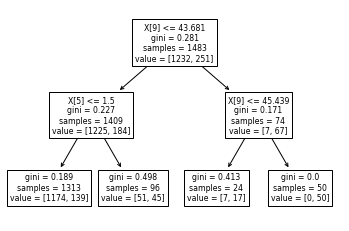

In [ ]:
# Finalmente, como en este nuevo árbol aclaré que quiero que tenga una profundidad máxima de 3 niveles, es factible dibujarlo. Observar el dibujo del árbol
# es muy útil para conocer los umbrales con los que decidió particionar los valores de los atributos cuantitativos.

from sklearn.tree import plot_tree

plot_tree(clft)

### Ejercicio 3.3: Inspección del Modelo